In [1]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data & Plot

In [2]:
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

In [4]:
# 여기 파일명만 수정하기
# 아니면 loop 돌리는거 정돈 만들 수 있자냐?
data, sr = librosa.load('../mel_output.wav', sr=22050)
data.shape

(66150,)

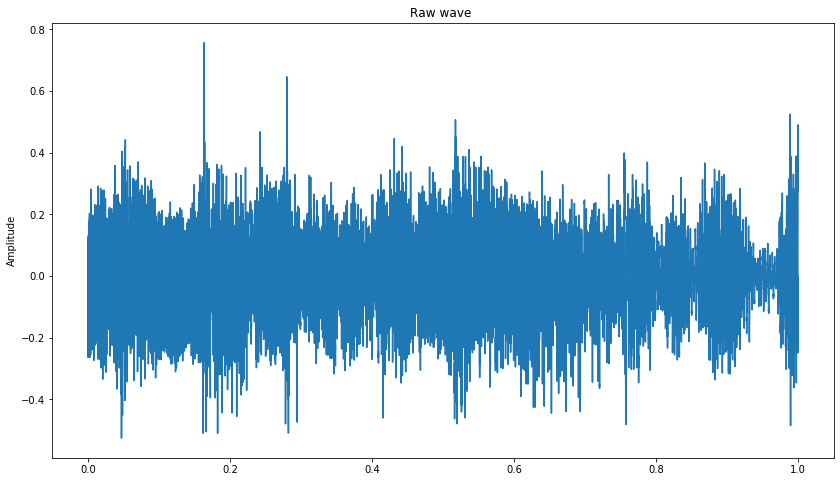

In [6]:
plot_time_series(data)

# 1. Adding white noise 

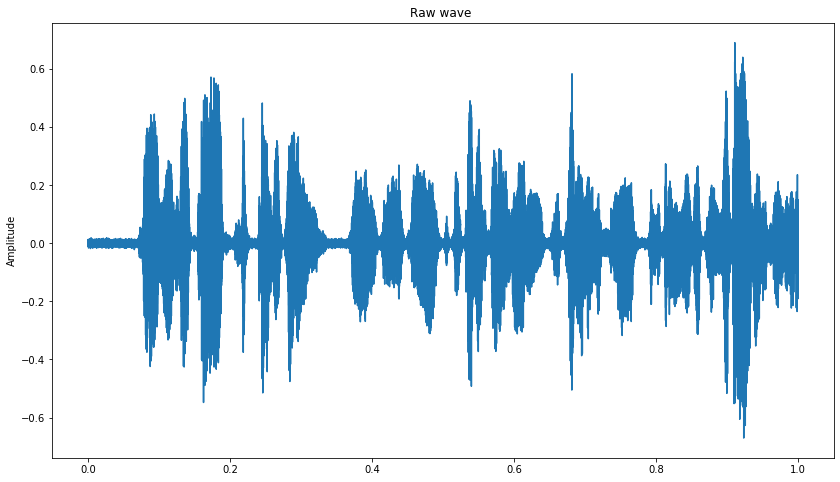

White Noise 저장 성공


0

In [20]:
def adding_white_noise(data, sr=22050, noise_rate=0.005):
    # We limited the amplitude of the noise so we can still hear the word even with the noise, 
    # which is the objective
    wn = np.random.randn(len(data))
    data_wn = data + noise_rate*wn
    plot_time_series(data_wn)
    librosa.output.write_wav('./white_noise.wav', data, sr=sr)
    print('White Noise 저장 성공')

    return 0

adding_white_noise(data)

# 2. Shifting the sound

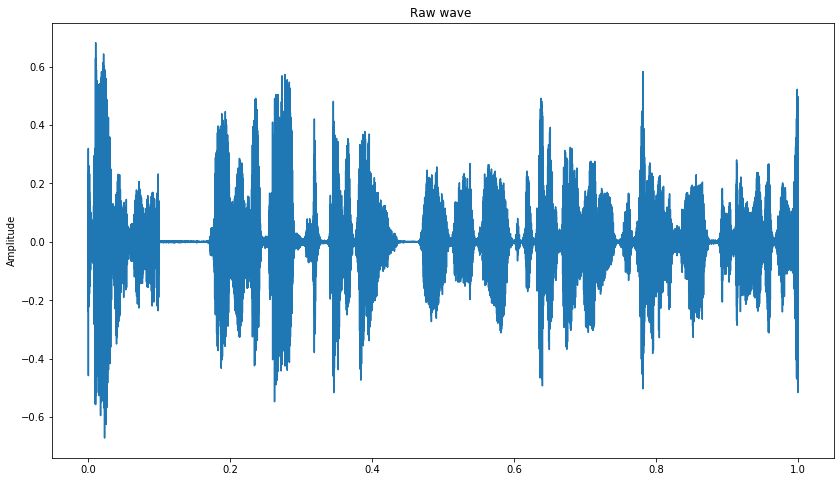

rolling_sound 저장 성공


In [34]:
def shifting_sound(data, sr=22050, roll_rate=0.1):
    # 그냥 [1, 2, 3, 4] 를 [4, 1, 2, 3]으로 만들어주는건데 이게 효과있는지는 잘 모르겠
    data_roll = np.roll(data, int(len(data) * roll_rate))
    plot_time_series(data_roll)
    librosa.output.write_wav('./rolling_sound.wav', data, sr=sr)
    print('rolling_sound 저장 성공')
    
shifting_sound(data)

# 3. Stretching the sound

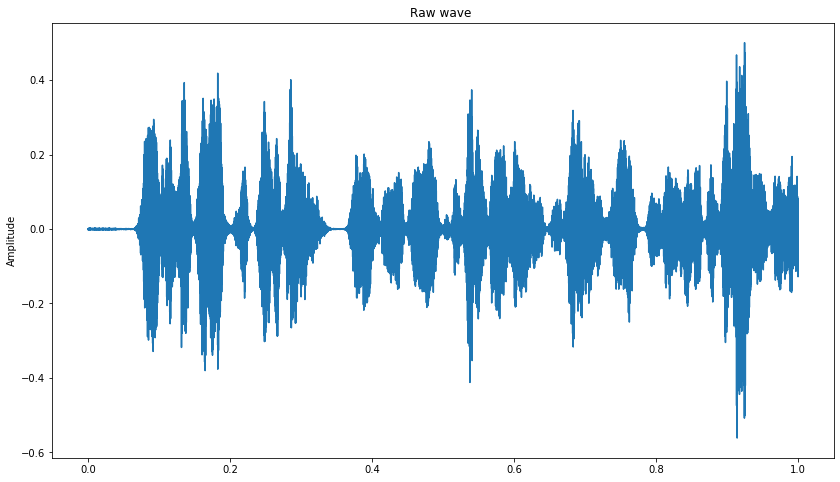

stretch_data 저장 성공


0

In [36]:
def stretch_sound(data, sr=22050, rate=0.8):
    # stretch 해주는거 비율이 뭐가 좋은지 잘모르겟, 0.8이랑, 1.2랑 차이가 안나는거 같음
    stretch_data = librosa.effects.time_stretch(data, rate)
    plot_time_series(stretch_data)
    librosa.output.write_wav('./stretch_data.wav', stretch_data, sr=sr)
    print('stretch_data 저장 성공')
    
    return 0

stretch_sound(data)

In [15]:
def reverse_sound(data, sr=22050):
    temp_array = []
    for i in range(len(data)):
        temp_array.append(data[len(data)-1-i])
    temp_numpy =np.asarray(temp_array)
    plot_time_series(temp_numpy)
    librosa.output.write_wav('./reverse_data.wav', temp_numpy, sr=sr)
    return 0

In [18]:
def minus_sound(data, sr=22050):
    temp_numpy = (-1)*data
    plot_time_series(temp_numpy)
    librosa.output.write_wav('./minus_data.wav', temp_numpy, sr=sr)
    return 0

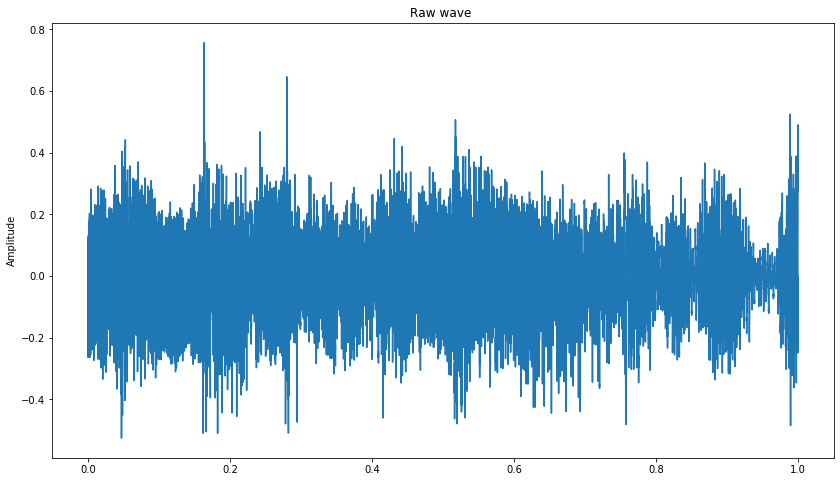

In [17]:
plot_time_series(data)

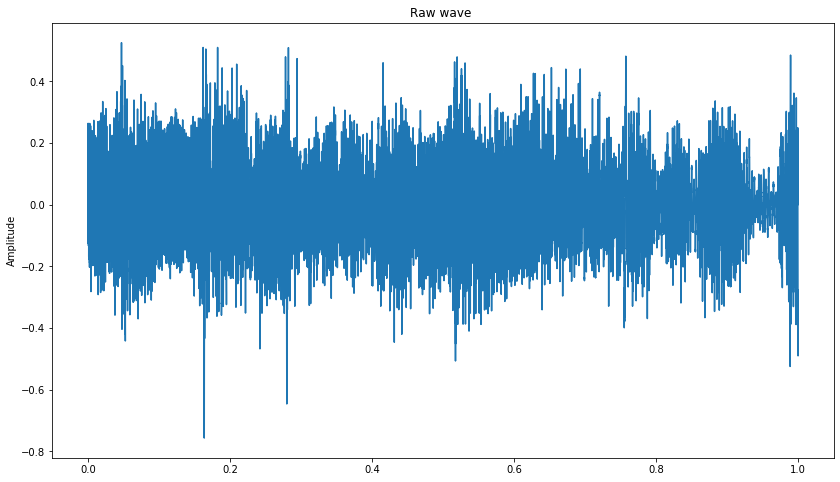

0

In [19]:
minus_sound(data, sr=22050)